In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
from torch.autograd import Variable

In [2]:
# Read Data from CSV
train = pd.read_csv('data/mnist.csv', header=0).values
x = train[:,1:] / 255.0
y = train[:,0]

# MNIST 10 Value
enc = OneHotEncoder(categories='auto')
y = enc.fit_transform(y.reshape(-1,1)).toarray()

In [3]:
# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [4]:
# Training Data Tensor
xt = Variable(torch.from_numpy(x_train), requires_grad=False).type(torch.FloatTensor)
yt = Variable(torch.from_numpy(y_train), requires_grad=False).type(torch.FloatTensor)

# Test Data tensor
xtest = Variable(torch.from_numpy(x_test), requires_grad=False).type(torch.FloatTensor)

print(xt.shape)
print(xt.size()[0])

torch.Size([29400, 784])
29400


In [5]:
# Neural Network Dimensions

input_dim = x_train.shape[1]
hid1_dim = 1000
hid2_dim = 500
hid3_dim = 100
output_dim = 10

# Batch size
batch = 1000

In [6]:
# Model with Torch
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hid1_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(hid1_dim, hid2_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(hid2_dim, hid3_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(hid3_dim, output_dim)
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=1000, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1000, out_features=500, bias=True)
  (3): ReLU()
  (4): Linear(in_features=500, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=10, bias=True)
)


In [7]:
# Loss Function
mse = torch.nn.MSELoss()

# Oprimization
lr = 1
optimizer = torch.optim.SGD(model.parameters(), lr)

print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 1
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [8]:
# Training
epoch = 100

list_loss = []
list_acc = []

for ep in range(epoch):
    eloss = 0
    for i in range(0, xt.size()[0] , batch):
        # Forward Pass
        yp = model(xt[i:(i+batch), :])
        ls = mse(yp, yt[i:(i+batch), :])

        eloss += ls.item()

        # Backward Pass
        optimizer.zero_grad()
        ls.backward()

        # Update Weight
        optimizer.step()
    
    # Test Accuracy
    ytpred = model(xtest).data.numpy()
    acc = np.sum(np.argmax(y_test, axis=1) == np.argmax(ytpred, axis=1)) / ytpred.shape[0]

    print('Epoch: %d, Loss: %f, Accuracy: %f' % (ep + 1, eloss, acc))
    list_loss.append(eloss)
    list_acc.append(acc)

Epoch: 1, Loss: 2.505054, Accuracy: 0.698016
Epoch: 2, Loss: 1.855931, Accuracy: 0.781508
Epoch: 3, Loss: 1.439852, Accuracy: 0.828968
Epoch: 4, Loss: 1.197943, Accuracy: 0.861905
Epoch: 5, Loss: 1.007741, Accuracy: 0.879444
Epoch: 6, Loss: 0.870072, Accuracy: 0.887857
Epoch: 7, Loss: 0.783599, Accuracy: 0.899048
Epoch: 8, Loss: 0.705776, Accuracy: 0.904365
Epoch: 9, Loss: 0.647099, Accuracy: 0.910159
Epoch: 10, Loss: 0.601637, Accuracy: 0.914286
Epoch: 11, Loss: 0.565357, Accuracy: 0.916587
Epoch: 12, Loss: 0.534677, Accuracy: 0.921032
Epoch: 13, Loss: 0.508023, Accuracy: 0.925159
Epoch: 14, Loss: 0.484073, Accuracy: 0.928413
Epoch: 15, Loss: 0.462562, Accuracy: 0.931429
Epoch: 16, Loss: 0.442856, Accuracy: 0.933413
Epoch: 17, Loss: 0.425176, Accuracy: 0.936587
Epoch: 18, Loss: 0.408794, Accuracy: 0.938492
Epoch: 19, Loss: 0.393635, Accuracy: 0.940317
Epoch: 20, Loss: 0.379510, Accuracy: 0.941905
Epoch: 21, Loss: 0.366370, Accuracy: 0.943095
Epoch: 22, Loss: 0.354020, Accuracy: 0.9449

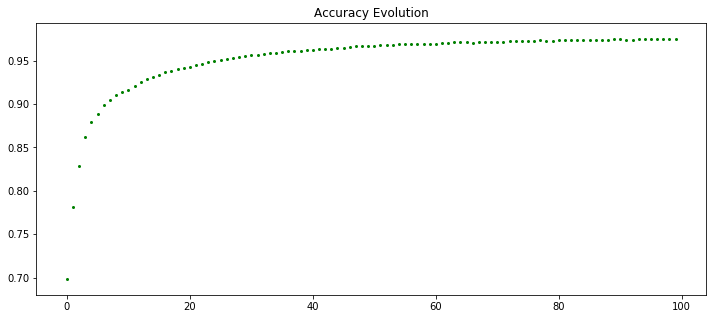

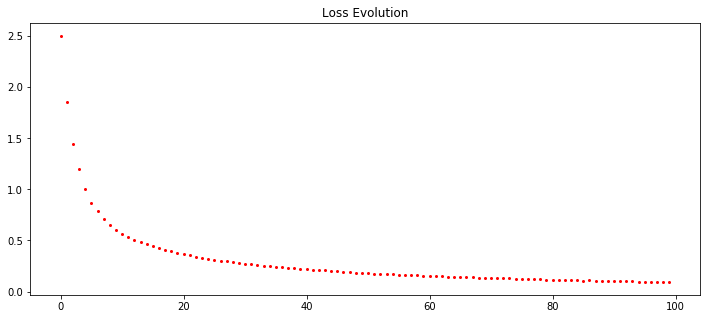

In [9]:
# Plot accuracy and loss
fig = plt.figure(figsize=(12,5))
plt.title('Accuracy Evolution')
plt.scatter(np.arange(epoch), list_acc, c=['green'], s=4)
plt.show()

fig = plt.figure(figsize=(12,5))
plt.title('Loss Evolution')
plt.scatter(np.arange(epoch), list_loss, c=['red'], s=4)
plt.show()